In [41]:
#ID:300595912
#Name:Zihao Zhang
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# get the dataset from openml
st = fetch_openml('steel-plates-fault',version=1)
io = fetch_openml('ionosphere',version=1)
ba = fetch_openml('banknote-authentication',version=1)

#make a dictionary to save those three dataset
datasets_dic= {
    "steel": st,
    "ion": io,
    "bank": ba,
}

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

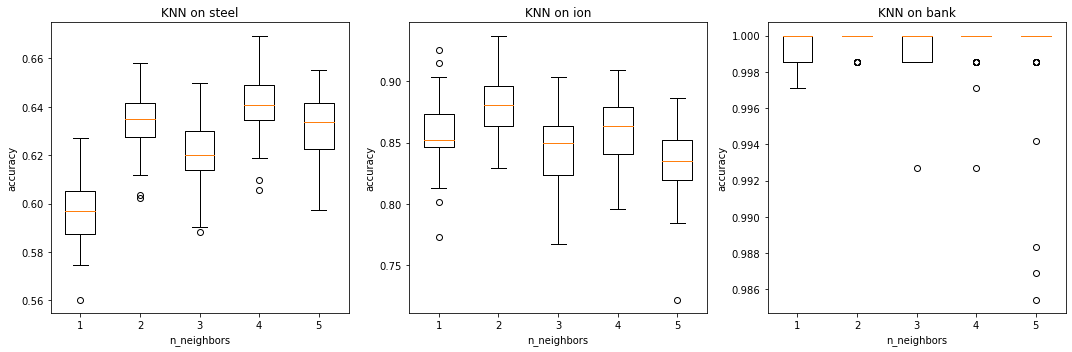

the mean value of test_error groups:steel [0.40364573 0.36626159 0.37952626 0.35991761 0.36838311]
the best mean value of test_error:steel 0.3599176107106077
the best value for the hyperparameter:steel 4
the mean value of test_error groups:ion [0.14420455 0.11863636 0.15727273 0.13852273 0.16568182]
the best mean value of test_error:ion 0.11863636363636365
the best value for the hyperparameter:ion 2
the mean value of test_error groups:bank [0.00067055 0.00020408 0.00058309 0.00046647 0.00113703]
the best mean value of test_error:bank 0.00020408163265306367
the best value for the hyperparameter:bank 2


In [24]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
# this function is used to get one array of scores of 50 times with different hyperarguments
def knn_acur(dataset,hyperarg):
    #initialization array 初始化数组
    arr1 = np.zeros(50)
    for i in range(50):
        #divide data into test and train 分割测试集训练集
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        # 创建 KNN 分类器
        neigh = KNeighborsClassifier(n_neighbors = hyperarg)
        # 将分类器拟合到数据
        neigh.fit(x_train,y_train)
        #评估测试集精确度p
        precision = neigh.score(x_test,y_test)
        #将精确度放入数组
        arr1[i] = precision
    return arr1

labels=[1,2,3,4,5]
pos=1
for name,dataset in datasets_dic.items():
    flg = plt.figure(figsize=(15, 5)) #the set of graph
    flg = plt.figure(1)
    #get diffrent scores from hyperparameter
    scores = [knn_acur(dataset,1),knn_acur(dataset,2),knn_acur(dataset,3),knn_acur(dataset,4),knn_acur(dataset,5)] 
    ax = plt.subplot(1,3,pos)
    pos += 1
    ax.boxplot(scores,labels = labels)
    ax.set(title="KNN on "+name, xlabel="n_neighbors", ylabel="accuracy")
plt.tight_layout()
plt.show()

for name,dataset in datasets_dic.items():
    scores = [knn_acur(dataset,1),knn_acur(dataset,2),knn_acur(dataset,3),knn_acur(dataset,4),knn_acur(dataset,5)] 
    #the mean value of test_error with different hyperparameter
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:"+name,meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:"+name,min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:"+name,labels[index])
    
        

    

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

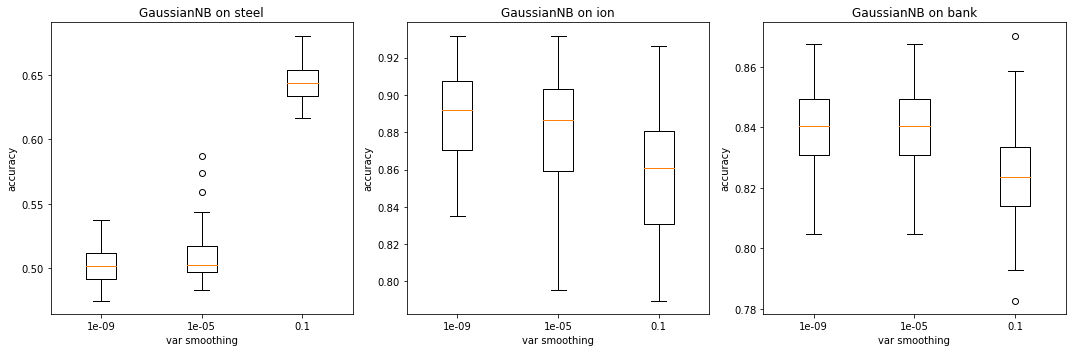

the mean value of test_error groups:steel [0.49738414 0.49081359 0.35520082]
the best mean value of test_error:steel 0.35520082389289387
the best value for the hyperparameter:steel 0.1
the mean value of test_error groups:ion [0.11159091 0.12045455 0.145     ]
the best mean value of test_error:ion 0.11159090909090918
the best value for the hyperparameter:ion 1e-09
the mean value of test_error groups:bank [0.15997085 0.15997085 0.17568513]
the best mean value of test_error:bank 0.15997084548104956
the best value for the hyperparameter:bank 1e-09


In [44]:
#GassianNB
from sklearn.naive_bayes import GaussianNB

def nb_acur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        nb_clf = GaussianNB(var_smoothing=hyperarg)
        nb_clf.fit(x_train,y_train)
        precision = nb_clf.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D

# labels=[1e-9,1e-5,1e-1]
# for dataset in [steel,ionos,bankn]:
#     scores = [nb_acur(dataset,1e-9),nb_acur(dataset,1e-5),nb_acur(dataset,1e-1)]
#     meanArr = 1-np.mean(scores, axis=1)
#     print("the mean value of test_error groups:",meanArr)
#     min_test_error=np.min(meanArr)
#     print("the best mean value of test_error:",min_test_error)
#     index=np.argmin(meanArr)
#     print("the best value for the hyperparameter:",labels[index])

#     plt.boxplot(scores,labels = labels)
#     plt.show()
    
labels=[1e-9,1e-5,1e-1]
pos=1
for name,dataset in datasets_dic.items():
    flg = plt.figure(figsize=(15, 5)) #the set of graph
    flg = plt.figure(1)
    #get diffrent scores from hyperparameter
    scores = [nb_acur(dataset,1e-9),nb_acur(dataset,1e-5),nb_acur(dataset,1e-1)]
    ax = plt.subplot(1,3,pos)
    pos += 1
    ax.boxplot(scores,labels = labels)
    ax.set(title="GaussianNB on "+name, xlabel="var smoothing", ylabel="accuracy")
plt.tight_layout()
plt.show()

for name,dataset in datasets_dic.items():
    scores = [nb_acur(dataset,1e-9),nb_acur(dataset,1e-5),nb_acur(dataset,1e-1)]
    #     the mean value of test_error in groups with different hyperparameter
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:"+name,meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:"+name,min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:"+name,labels[index])

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

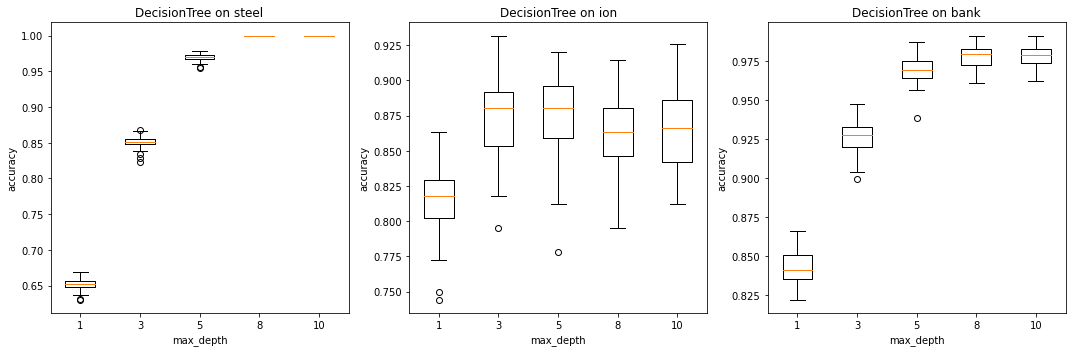

the mean value of test_error groups:steel [0.34795057 0.14850669 0.03066941 0.         0.        ]
the best mean value of test_error:steel 0.0
the best value for the hyperparameter:steel 8
the mean value of test_error groups:ion [0.18215909 0.12761364 0.12659091 0.12863636 0.13329545]
the best mean value of test_error:ion 0.1265909090909091
the best value for the hyperparameter:ion 5
the mean value of test_error groups:bank [0.15720117 0.07393586 0.03067055 0.02265306 0.02259475]
the best mean value of test_error:bank 0.022594752186588796
the best value for the hyperparameter:bank 10


In [49]:
# for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

def DT_acur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        dt_clf = DecisionTreeClassifier(max_depth=hyperarg)
        dt_clf.fit(x_train,y_train)
        precision = dt_clf.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D

# labels=[1,3,5,8,10]
# for dataset in [st,io,ba]:
#     scores = [tree_acur(dataset,1),tree_acur(dataset,3),tree_acur(dataset,5),tree_acur(dataset,8),tree_acur(dataset,10)]
#     meanArr = 1-np.mean(scores, axis=1)
#     print("the mean value of test_error groups:",meanArr)
#     min_test_error=np.min(meanArr)
#     print("the best mean value of test_error:",min_test_error)
#     index=np.argmin(meanArr)
#     print("the best value for the hyperparameter:",labels[index])

#     plt.boxplot(scores,labels = labels)
#     plt.show()

labels=[1,3,5,8,10]
pos=1
for name,dataset in datasets_dic.items():
    flg = plt.figure(figsize=(15, 5)) #the set of graph
    flg = plt.figure(1)
    #get diffrent scores from hyperparameter
    scores = [DT_acur(dataset,1),DT_acur(dataset,3),DT_acur(dataset,5),DT_acur(dataset,8),DT_acur(dataset,10)]
    ax = plt.subplot(1,3,pos)
    pos += 1
    ax.boxplot(scores,labels = labels)
    ax.set(title="DecisionTree on "+name, xlabel="max_depth", ylabel="accuracy")
plt.tight_layout()
plt.show()

for name,dataset in datasets_dic.items():
    scores = [DT_acur(dataset,1),DT_acur(dataset,3),DT_acur(dataset,5),DT_acur(dataset,8),DT_acur(dataset,10)]
    #     the mean value of test_error in groups with different hyperparameter
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:"+name,meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:"+name,min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:"+name,labels[index])

/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

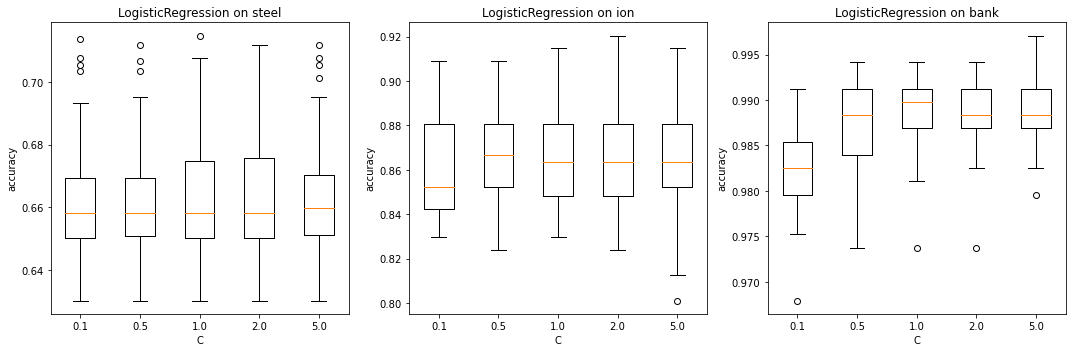

/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

the mean value of test_error groups:steel [0.33592173 0.33600412 0.33524202 0.33505664 0.33524202]
the best mean value of test_error:steel 0.3350566426364573
the best value for the hyperparameter:steel 2.0
the mean value of test_error groups:ion [0.13965909 0.13443182 0.13420455 0.13340909 0.13568182]
the best mean value of test_error:ion 0.13340909090909103
the best value for the hyperparameter:ion 2.0
the mean value of test_error groups:bank [0.01752187 0.01259475 0.01099125 0.01119534 0.01119534]
the best mean value of test_error:bank 0.010991253644314858
the best value for the hyperparameter:bank 1.0


In [54]:
# for LogisticRegression
from sklearn.linear_model import LogisticRegression

def LR_acur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        logreg = LogisticRegression(C=hyperarg)
        logreg.fit(x_train, y_train)
        precision = logreg.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D


# labels=[0.1,0.5,1.0,2.0,5.0]
# for dataset in [st,io,ba]:
#     scores = [log_acur(dataset,0.1),log_acur(dataset,0.5),log_acur(dataset,1.0),log_acur(dataset,2.0),log_acur(dataset,5.0)]
#     meanArr = 1-np.mean(scores, axis=1)
#     print("the mean value of test_error groups:",meanArr)
#     min_test_error=np.min(meanArr)
#     print("the best mean value of test_error:",min_test_error)
#     index=np.argmin(meanArr)
#     print("the best value for the hyperparameter:",labels[index])

#     plt.boxplot(scores,labels = labels)
#     plt.show()

labels=[0.1,0.5,1.0,2.0,5.0]
pos=1
for name,dataset in datasets_dic.items():
    flg = plt.figure(figsize=(15, 5)) #the set of graph
    flg = plt.figure(1)
    #get diffrent scores from hyperparameter
    scores = [LR_acur(dataset,0.1),LR_acur(dataset,0.5),LR_acur(dataset,1.0),LR_acur(dataset,2.0),LR_acur(dataset,5.0)]
    ax = plt.subplot(1,3,pos)
    pos += 1
    ax.boxplot(scores,labels = labels)
    ax.set(title="LogisticRegression on "+name, xlabel="C", ylabel="accuracy")
plt.tight_layout()
plt.show()

for name,dataset in datasets_dic.items():
    scores = [LR_acur(dataset,0.1),LR_acur(dataset,0.5),LR_acur(dataset,1.0),LR_acur(dataset,2.0),LR_acur(dataset,5.0)]
    #the mean value of test_error in groups with different hyperparameter
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:"+name,meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:"+name,min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:"+name,labels[index])

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

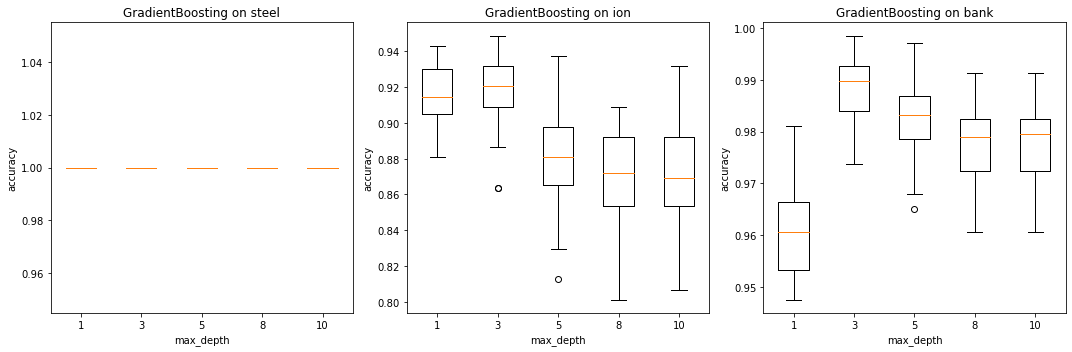

the mean value of test_error groups:steel [0. 0. 0. 0. 0.]
the best mean value of test_error:steel 0.0
the best value for the hyperparameter:steel 1
the mean value of test_error groups:ion [0.08329545 0.08261364 0.12147727 0.13022727 0.12909091]
the best mean value of test_error:ion 0.08261363636363639
the best value for the hyperparameter:ion 3
the mean value of test_error groups:bank [0.03921283 0.01110787 0.01769679 0.02241983 0.02218659]
the best mean value of test_error:bank 0.011107871720116735
the best value for the hyperparameter:bank 3


In [53]:
# for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

def gbAcur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        gb_clf = GradientBoostingClassifier(max_depth=hyperarg)
        gb_clf.fit(x_train,y_train)
        precision = gb_clf.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D
#draw
labels=[1,3,5,8,10]
pos=1
for name,dataset in datasets_dic.items():
    flg = plt.figure(figsize=(15, 5)) #the set of graph
    flg = plt.figure(1)
    #get diffrent scores from hyperparameter
    scores = [gbAcur(dataset,1),gbAcur(dataset,3),gbAcur(dataset,5),gbAcur(dataset,8),gbAcur(dataset,10)]
    ax = plt.subplot(1,3,pos)
    pos += 1
    ax.boxplot(scores,labels = labels)
    ax.set(title="GradientBoosting on "+name, xlabel="max_depth", ylabel="accuracy")
plt.tight_layout()
plt.show()

for name,dataset in datasets_dic.items():
    scores = [gbAcur(dataset,1),gbAcur(dataset,3),gbAcur(dataset,5),gbAcur(dataset,8),gbAcur(dataset,10)]
    #the mean value of test_error in groups with different hyperparameter
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:"+name,meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:"+name,min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:"+name,labels[index])


    

the mean value of test_error groups: [0.34795057 0.16181256 0.04801236 0.02067971 0.01577755]
the best mean value of test_error: 0.015777548918640694
the best value for the hyperparameter: 10


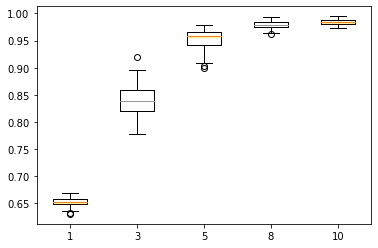

the mean value of test_error groups: [0.15295455 0.07954545 0.07340909 0.07238636 0.07272727]
the best mean value of test_error: 0.07238636363636364
the best value for the hyperparameter: 8


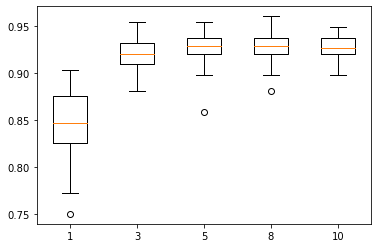

the mean value of test_error groups: [0.1255102  0.04833819 0.01897959 0.01011662 0.00994169]
the best mean value of test_error: 0.009941690962099181
the best value for the hyperparameter: 10


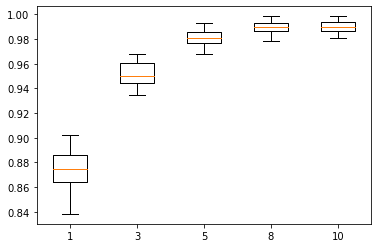

In [50]:
# for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

def rf_acur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
        rf_clf = RandomForestClassifier(max_depth=hyperarg)
        rf_clf.fit(x_train, y_train)
        precision = rf_clf.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D

labels=[1,3,5,8,10]
for dataset in [st,io,ba]:
    scores = [rf_acur(dataset,1),rf_acur(dataset,3),rf_acur(dataset,5),rf_acur(dataset,8),rf_acur(dataset,10)]
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:",meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:",min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:",labels[index])

    plt.boxplot(scores,labels = labels)
    plt.show()

the mean value of test_error groups: [0.4077034  0.40107106 0.38902163 0.39621009]
the best mean value of test_error: 0.38902162718846556
the best value for the hyperparameter: 0.1


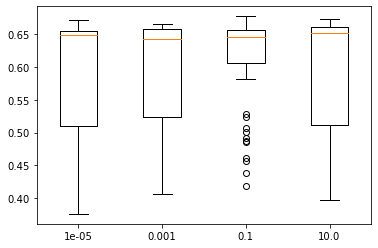

/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

the mean value of test_error groups: [0.09738636 0.09625    0.09852273 0.13511364]
the best mean value of test_error: 0.09625000000000017
the best value for the hyperparameter: 0.001


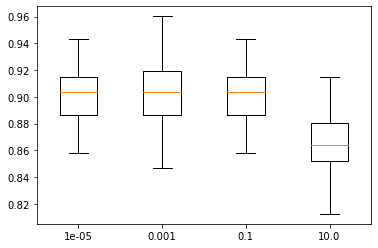

/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

the mean value of test_error groups: [0.00000000e+00 8.74635569e-05 8.74635569e-05 1.73760933e-02]
the best mean value of test_error: 0.0
the best value for the hyperparameter: 1e-05


/Users/zhangzihao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


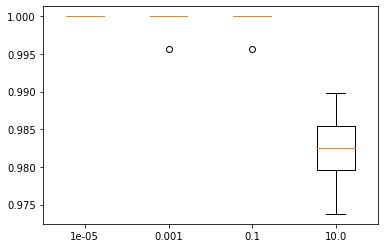

In [52]:
# for MLPClassifier
from sklearn.neural_network import MLPClassifier
def mlp_acur(dataset,hyperarg):
    arr1D = np.zeros(50)
    for i in range(50):
        x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = 0.5,random_state=i)
#         To achieve convergence, increase the maximum iteration coefficient
        mlp_clf = MLPClassifier(alpha=hyperarg)#float value, default=0.0001
        mlp_clf.fit(x_train, y_train)
        precision = mlp_clf.score(x_test,y_test)
        arr1D[i] = precision
    return arr1D

#draw
# labels=[1e-5,1e-3,0.1,10.0]
# pos=1
# for name,dataset in datasets_dic.items():
#     flg = plt.figure(figsize=(15, 5)) #the set of graph
#     flg = plt.figure(1)
#     #get diffrent scores from hyperparameter
#     scores = [mlp_acur(dataset,1e-5),mlp_acur(dataset,1e-3),mlp_acur(dataset,0.1),mlp_acur(dataset,10.0)]
#     ax = plt.subplot(1,3,pos)
#     pos += 1
#     ax.boxplot(scores,labels = labels)
#     ax.set(title="MLP on "+name, xlabel="alpha", ylabel="accuracy")
# plt.show()

# for name,dataset in datasets_dic.items():
#     scores = [mlp_acur(dataset,1e-5),mlp_acur(dataset,1e-3),mlp_acur(dataset,0.1),mlp_acur(dataset,10.0)]
#     #the mean value of test_error in groups with different hyperparameter
#     meanArr = 1-np.mean(scores, axis=1)
#     print("the mean value of test_error groups:"+name,meanArr)
#     min_test_error=np.min(meanArr)
#     print("the best mean value of test_error:"+name,min_test_error)
#     index=np.argmin(meanArr)
#     print("the best value for the hyperparameter:"+name,labels[index])

labels=[1e-5,1e-3,0.1,10.0]
for dataset in [st,io,ba]:
    scores = [mlp_acur(dataset,1e-5),mlp_acur(dataset,1e-3),mlp_acur(dataset,0.1),mlp_acur(dataset,10.0)]
    meanArr = 1-np.mean(scores, axis=1)
    print("the mean value of test_error groups:",meanArr)
    min_test_error=np.min(meanArr)
    print("the best mean value of test_error:",min_test_error)
    index=np.argmin(meanArr)
    print("the best value for the hyperparameter:",labels[index])

    plt.boxplot(scores,labels = labels)
    plt.show()
